

```
# Dit is opgemaakt als code
```

Upload de laatste versies van deze bestanden:


1.   screencast_analysis.xlsx
2.   Final.xlsx




# Loading data and setup

In [63]:
from dotenv import load_dotenv
import os

load_dotenv()
screencast_analysis = os.getenv('SCREENCAST_ANALYSIS')
repo_analysis = os.getenv('REPO_ANALYSIS')

[screencast_analysis, repo_analysis]

['/Users/quintenmeijboom/OneDrive - Avans Hogeschool/Stage/Onderzoek/screencast_analysis.xlsx',
 '/Users/quintenmeijboom/OneDrive - Avans Hogeschool/Stage/Onderzoek/Analyse/Final.xlsx']

In [64]:
import pandas as pd
from datetime import time
import matplotlib.pyplot as plt

screencast_data = pd.ExcelFile(fr"{screencast_analysis}")
repo_analyse_data = pd.ExcelFile(fr"{repo_analysis}")

ronde_1_data = pd.read_excel(screencast_data, sheet_name='metrics', header=1, nrows=12)
ronde_2_data = pd.read_excel(screencast_data, sheet_name='metrics', skiprows=38, nrows=10)

ronde_1_average_times = pd.read_excel(screencast_data, sheet_name='Analyse_without_ai', header=0, nrows=1, usecols=['average_time_finding_comment', 'average_time_understand_comment_and_code', 'average_time_edit_comment'])
ronde_2_average_times = pd.read_excel(screencast_data, sheet_name='Analyse_using_ai', header=0, nrows=1, usecols=['average_time_finding_comment', 'average_time_understand_comment_and_code', 'average_time_edit_comment'])

In [65]:
ronde_2_average_times

,average_time_finding_comment,average_time_understand_comment_and_code,average_time_edit_comment
0,00:01:52.100000,00:10:27,00:01:06.400000


In [66]:
ronde_1_data

,name,amount_changed,amount_changed_correct,amount_changed_wrong,amount_faulty_missed,description
0,Paul,7,1,6,5,"Verwijderde veel delen van de comments, Voegde..."
1,Jelger,23,20,3,9,NaN
2,Martijn,0,0,0,6,Voegde zelf comments toe (niet meegenomen in d...
3,Siemen,4,4,0,6,Voegde zelf comments toe (niet meegenomen in d...
4,Rachid,4,4,0,4,Pastte code aan (niet meegenomen in de amounts)
5,Hannah,6,5,1,8,NaN
6,Luca,33,26,2,5,Wel een heel aantal dingen veranderd die niet ...
7,Jeroen,32,27,5,4,"Heeft de code zelf geschreven, dus heeft voork..."
8,Bor,13,11,2,19,Voegde zelf comments toe (niet meegenomen in d...
9,Drikus,5,5,0,4,Pastte code aan (niet meegenomen in de amounts)


In [67]:
ronde_2_data

,name,amount_changed,amount_edited,amount_ai_chosen,amount_non_ai_chosen,amount_changed_correct,amount_changed_wrong,description
0,Jelger,31,2,30,1,29,2,NaN
1,Siemen,9,1,8,1,8,1,NaN
2,Rachid,31,0,27,4,30,1,NaN
3,Hannah,25,0,21,4,24,1,NaN
4,Luca,31,1,31,0,31,0,NaN
5,Jeroen,25,0,25,0,25,0,NaN
6,Bor,16,2,13,3,12,4,NaN
7,Drikus,21,1,18,3,18,3,NaN
8,Danny,13,3,12,1,13,0,NaN
9,Peer,12,0,12,0,10,2,NaN


# Filtering

In [68]:
colnames = ['name', 'time_finding_comment', 'time_understand_comment_and_code', 'time_edit_comment']

before_ai_data = pd.read_excel(screencast_data, sheet_name='metrics', usecols=colnames, skiprows=19, nrows=12)
with_ai_data = pd.read_excel(screencast_data, sheet_name='metrics', usecols=colnames, skiprows=54, nrows=11)
# hierboven staat: neem sheet metrics, skip n rows (skiprows), header row is n omlaag (header), neem n rows (nrows)

# Filter de DataFrame door alleen rijen te behouden waar kolom 1 niet NaN is
cleaned_ronde_2_data = ronde_2_data[ronde_2_data.iloc[:, 1].notna()]
cleaned_ai_data = with_ai_data[with_ai_data.iloc[:, 1].notna()]
cleaned_ai_data = cleaned_ai_data[~with_ai_data.loc[:, 'time_finding_comment'].isin([time(0, 0)])]

In [69]:
with_ai_data

,name,time_finding_comment,time_understand_comment_and_code,time_edit_comment
0,Jelger,00:01:01,00:05:58,00:01:38
1,Siemen,00:01:21,00:12:48,00:00:59
2,Rachid,00:01:49,00:09:52,00:01:39
3,Hannah,00:01:08,00:11:45,00:01:13
4,Luca,00:03:10,00:10:25,00:00:53
5,Jeroen,00:03:21,00:06:03,00:01:14
6,Bor,00:01:10,00:12:59,00:00:39
7,Drikus,00:02:26,00:12:09,00:00:33
8,Danny,00:01:32,00:10:08,00:01:22
9,Peer,00:01:43,00:12:23,00:00:54


In [70]:
cleaned_ronde_2_data

,name,amount_changed,amount_edited,amount_ai_chosen,amount_non_ai_chosen,amount_changed_correct,amount_changed_wrong,description
0,Jelger,31,2,30,1,29,2,NaN
1,Siemen,9,1,8,1,8,1,NaN
2,Rachid,31,0,27,4,30,1,NaN
3,Hannah,25,0,21,4,24,1,NaN
4,Luca,31,1,31,0,31,0,NaN
5,Jeroen,25,0,25,0,25,0,NaN
6,Bor,16,2,13,3,12,4,NaN
7,Drikus,21,1,18,3,18,3,NaN
8,Danny,13,3,12,1,13,0,NaN
9,Peer,12,0,12,0,10,2,NaN


# Joining and selecting


In [71]:
# Selecteer alle namen en converteer naar array
cleaned_ronde_2_names = cleaned_ronde_2_data.loc[:, 'name'].to_numpy()

# Doe daarna een inner join op naam zodat we alleen data overhouden voor mensen die meetdata hebben voor ronde 1 en ronde 2.
cleaned_ronde_1_data = ronde_1_data[ronde_1_data.iloc[:, 0].isin(cleaned_ronde_2_names)]
cleaned_before_ai_data = before_ai_data[before_ai_data.iloc[:, 0].isin(cleaned_ronde_2_names)]


cleaned_ronde_1_data.set_index('name', inplace=True)
cleaned_ronde_2_data.set_index('name', inplace=True)
cleaned_before_ai_data.set_index('name', inplace=True)
cleaned_ai_data.set_index('name', inplace=True)

# Converting data

In [72]:
from datetime import datetime
from typing import Optional

def time_to_seconds(time: datetime.time):
    return (time.hour * 60 + time.minute) * 60 + time.second


def convert_field_to_seconds(datatable: pd.DataFrame, field: Optional[str] = None):
    datatable = datatable.copy()
    if field is None:
        for col in datatable.columns:
            # Pas de functie toe op de gehele kolom
            datatable[f"{col}_seconds"] = datatable[col].apply(time_to_seconds)
    else:
        datatable[f"{field}_seconds"] = datatable[field].apply(time_to_seconds)

    return datatable


# converteer datetime.time naar secondes.
converted_cleaned_before_ai_data = convert_field_to_seconds(cleaned_before_ai_data)
converted_cleaned_ai_data = convert_field_to_seconds(cleaned_ai_data)

converted_round_1_average_times = convert_field_to_seconds(ronde_1_average_times)
converted_round_2_average_times = convert_field_to_seconds(ronde_2_average_times)

In [73]:
converted_round_2_average_times

,average_time_finding_comment,average_time_understand_comment_and_code,average_time_edit_comment,average_time_finding_comment_seconds,average_time_understand_comment_and_code_seconds,average_time_edit_comment_seconds
0,00:01:52.100000,00:10:27,00:01:06.400000,112,627,66


# Draw graphs

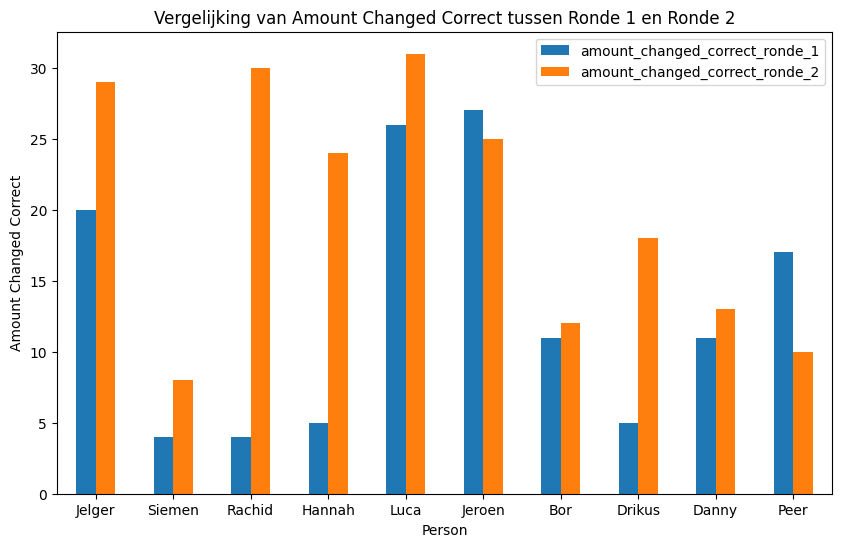

In [74]:
# Diff graph amount changed correctly
combined_data = pd.merge(cleaned_ronde_1_data[['amount_changed_correct']],
                          cleaned_ronde_2_data[['amount_changed_correct']],
                          on='name',
                          suffixes=('_ronde_1', '_ronde_2'))

combined_data.plot(kind='bar', figsize=(10, 6))
plt.title('Vergelijking van Amount Changed Correct tussen Ronde 1 en Ronde 2')
plt.ylabel('Amount Changed Correct')
plt.xlabel('Person')
plt.xticks(rotation=0)
plt.show()




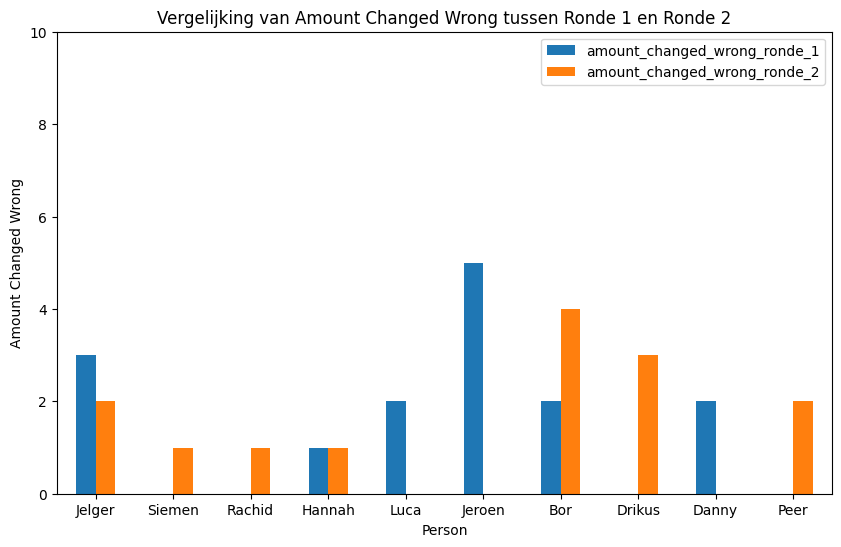

In [75]:
# diff amount changed wrong
combined_data = pd.merge(cleaned_ronde_1_data[['amount_changed_wrong']],
                          cleaned_ronde_2_data[['amount_changed_wrong']],
                          on='name',
                          suffixes=('_ronde_1', '_ronde_2'))
combined_data.plot(kind='bar', figsize=(10, 6))
plt.title('Vergelijking van Amount Changed Wrong tussen Ronde 1 en Ronde 2')
plt.ylabel('Amount Changed Wrong')
plt.xlabel('Person')
plt.xticks(rotation=0)
plt.ylim(0, 10)
plt.show()




In [76]:
converted_cleaned_before_ai_data

,time_finding_comment,time_understand_comment_and_code,time_edit_comment,time_finding_comment_seconds,time_understand_comment_and_code_seconds,time_edit_comment_seconds
name,,,,,,
Jelger,00:00:39,00:11:06,00:02:40,39,666,160
Siemen,00:00:46,00:10:30,00:02:11,46,630,131
Rachid,00:00:25,00:13:42,00:00:37,25,822,37
Hannah,00:00:36,00:13:29,00:00:40,36,809,40
Luca,00:00:54,00:09:53,00:02:58,54,593,178
Jeroen,00:01:07,00:07:34,00:05:01,67,454,301
Bor,00:00:42,00:12:10,00:00:44,42,730,44
Drikus,00:00:17,00:14:16,00:00:30,17,856,30
Danny,00:01:00,00:11:59,00:01:22,60,719,82


In [77]:
converted_cleaned_ai_data

,time_finding_comment,time_understand_comment_and_code,time_edit_comment,time_finding_comment_seconds,time_understand_comment_and_code_seconds,time_edit_comment_seconds
name,,,,,,
Jelger,00:01:01,00:05:58,00:01:38,61,358,98
Siemen,00:01:21,00:12:48,00:00:59,81,768,59
Rachid,00:01:49,00:09:52,00:01:39,109,592,99
Hannah,00:01:08,00:11:45,00:01:13,68,705,73
Luca,00:03:10,00:10:25,00:00:53,190,625,53
Jeroen,00:03:21,00:06:03,00:01:14,201,363,74
Bor,00:01:10,00:12:59,00:00:39,70,779,39
Drikus,00:02:26,00:12:09,00:00:33,146,729,33
Danny,00:01:32,00:10:08,00:01:22,92,608,82


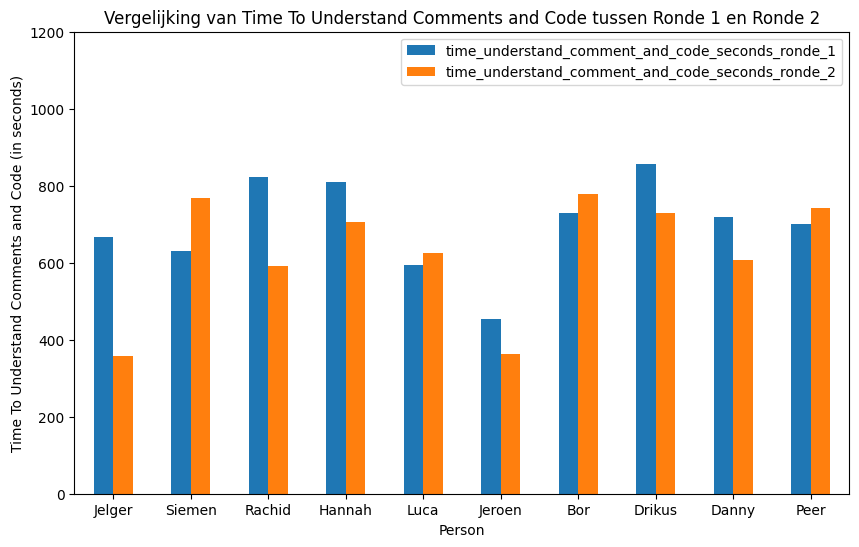

In [78]:
# diff building context
combined_data = pd.merge(converted_cleaned_before_ai_data[['time_understand_comment_and_code_seconds']],
                          converted_cleaned_ai_data[['time_understand_comment_and_code_seconds']],
                          on='name',
                          suffixes=('_ronde_1', '_ronde_2'))

combined_data.plot(kind='bar', figsize=(10, 6))
plt.title('Vergelijking van Time To Understand Comments and Code tussen Ronde 1 en Ronde 2')
plt.ylabel('Time To Understand Comments and Code (in seconds)')
plt.xlabel('Person')
plt.xticks(rotation=0)
plt.ylim(0, 1200)
plt.show()

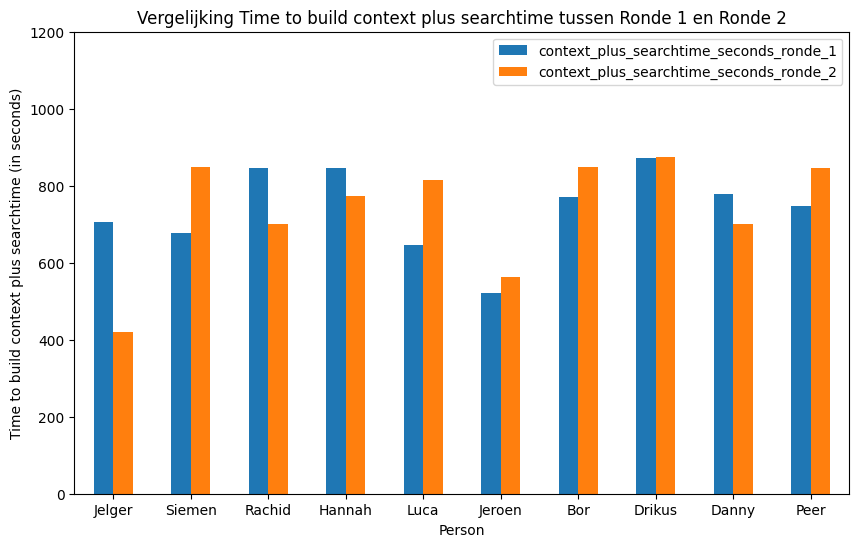

In [79]:
# diff time building context plus searchtime
converted_cleaned_before_ai_data['context_plus_searchtime_seconds'] = converted_cleaned_before_ai_data['time_finding_comment_seconds'] + converted_cleaned_before_ai_data[
    'time_understand_comment_and_code_seconds']
converted_cleaned_ai_data['context_plus_searchtime_seconds'] = converted_cleaned_ai_data['time_finding_comment_seconds'] + converted_cleaned_ai_data[
    'time_understand_comment_and_code_seconds']

combined_data = pd.merge(converted_cleaned_before_ai_data[['context_plus_searchtime_seconds']],
                          converted_cleaned_ai_data[['context_plus_searchtime_seconds']],
                          on='name',
                          suffixes=('_ronde_1', '_ronde_2'))

combined_data.plot(kind='bar', figsize=(10, 6))
plt.title('Vergelijking Time to build context plus searchtime tussen Ronde 1 en Ronde 2')
plt.ylabel('Time to build context plus searchtime (in seconds)')
plt.xlabel('Person')
plt.xticks(rotation=0)
plt.ylim(0, 1200)
plt.show()

In [80]:
combined_data

,context_plus_searchtime_seconds_ronde_1,context_plus_searchtime_seconds_ronde_2
name,,
Jelger,705,419
Siemen,676,849
Rachid,847,701
Hannah,845,773
Luca,647,815
Jeroen,521,564
Bor,772,849
Drikus,873,875
Danny,779,700


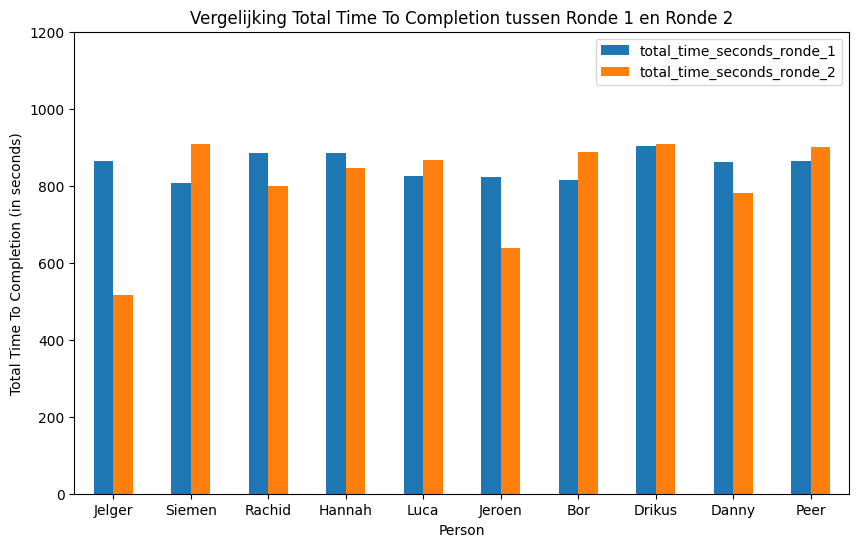

In [81]:
# diff time to completion
converted_cleaned_before_ai_data['total_time_seconds'] = converted_cleaned_before_ai_data['time_finding_comment_seconds'] + converted_cleaned_before_ai_data[
    'time_understand_comment_and_code_seconds'] + converted_cleaned_before_ai_data['time_edit_comment_seconds']
converted_cleaned_ai_data['total_time_seconds'] = converted_cleaned_ai_data['time_finding_comment_seconds'] + converted_cleaned_ai_data[
    'time_understand_comment_and_code_seconds'] + converted_cleaned_ai_data['time_edit_comment_seconds']

combined_data = pd.merge(converted_cleaned_before_ai_data[['total_time_seconds']],
                          converted_cleaned_ai_data[['total_time_seconds']],
                          on='name',
                          suffixes=('_ronde_1', '_ronde_2'))

combined_data.plot(kind='bar', figsize=(10, 6))
plt.title('Vergelijking Total Time To Completion tussen Ronde 1 en Ronde 2')
plt.ylabel('Total Time To Completion (in seconds)')
plt.xlabel('Person')
plt.xticks(rotation=0)
plt.ylim(0, 1200)
plt.show()

In [82]:
combined_data

,total_time_seconds_ronde_1,total_time_seconds_ronde_2
name,,
Jelger,865,517
Siemen,807,908
Rachid,884,800
Hannah,885,846
Luca,825,868
Jeroen,822,638
Bor,816,888
Drikus,903,908
Danny,861,782


In [83]:
# # diff average times round 1 and 2
concat = pd.concat([converted_round_1_average_times, converted_round_2_average_times])

concat

,average_time_finding_comment,average_time_understand_comment_and_code,average_time_edit_comment,average_time_finding_comment_seconds,average_time_understand_comment_and_code_seconds,average_time_edit_comment_seconds
0,00:00:49.750000,00:11:19.667000,00:02:15.833000,49,679,135
0,00:01:52.100000,00:10:27,00:01:06.400000,112,627,66


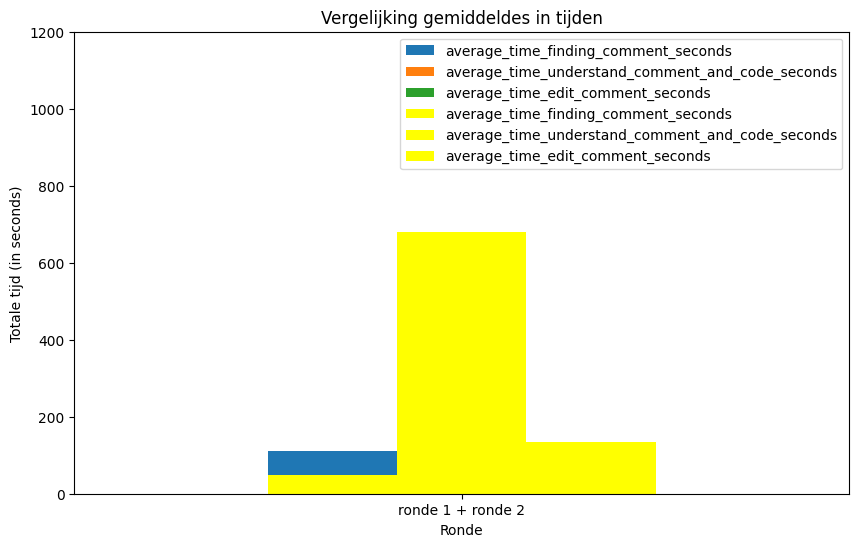

In [84]:
labels = ['ronde 1 + ronde 2']

plot_1 = converted_round_2_average_times.plot(kind='bar', figsize=(10, 6))
converted_round_1_average_times.plot(kind='bar', figsize=(10, 6), ax=plot_1, color="yellow")


plt.title('Vergelijking gemiddeldes in tijden')
plt.ylabel('Totale tijd (in seconds)')
plt.xlabel('Ronde')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)
plt.ylim(0, 1200)
plt.show()

In [85]:
# keep only seconds-columns from round 2
selected_columns = converted_round_2_average_times.columns[3:]
filtered_df_2 = converted_round_2_average_times[selected_columns]
filtered_df_2

,average_time_finding_comment_seconds,average_time_understand_comment_and_code_seconds,average_time_edit_comment_seconds
0,112,627,66


In [86]:
# keep only seconds-columns from round 1
selected_columns = converted_round_1_average_times.columns[3:]
filtered_df_1 = converted_round_1_average_times[selected_columns]
filtered_df_1

,average_time_finding_comment_seconds,average_time_understand_comment_and_code_seconds,average_time_edit_comment_seconds
0,49,679,135


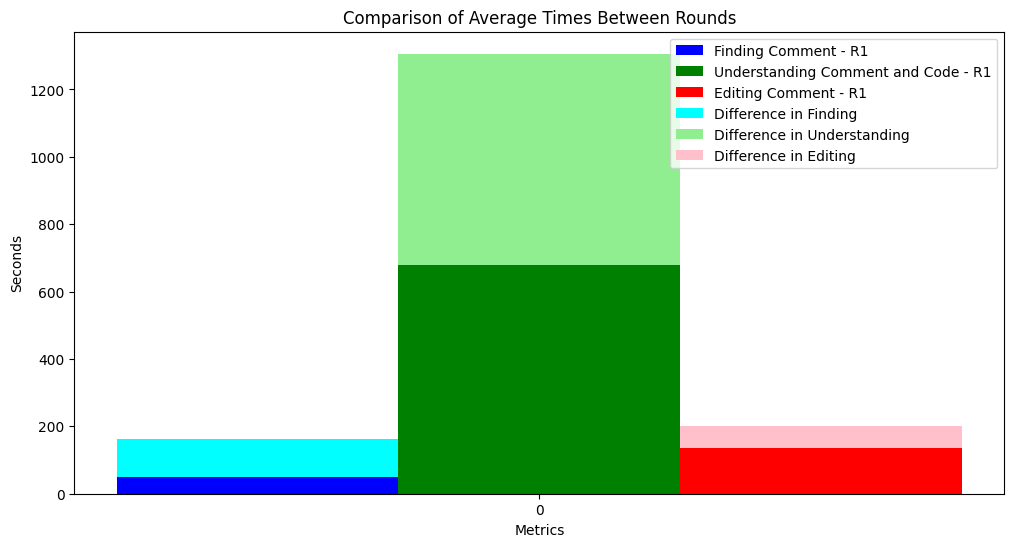

In [87]:
import numpy as np

diff_df = filtered_df_2.subtract(filtered_df_1)
plot_data = pd.concat([filtered_df_1, filtered_df_2], axis=1)
plot_data.columns = ['finding_r1', 'understanding_r1', 'editing_r1',
                     'diff_finding', 'diff_understanding', 'diff_editing']

# X-coördinaten voor elke groep van staven
x = np.arange(len(plot_data))

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Teken de waarden voor Ronde 1
ax.bar(x - 0.2, plot_data['finding_r1'], width=0.2, label='Finding Comment - R1', color='blue')
ax.bar(x, plot_data['understanding_r1'], width=0.2, label='Understanding Comment and Code - R1', color='green')
ax.bar(x + 0.2, plot_data['editing_r1'], width=0.2, label='Editing Comment - R1', color='red')

# Teken de verschillen
ax.bar(x - 0.2, plot_data['diff_finding'], width=0.2, bottom=plot_data['finding_r1'], label='Difference in Finding', color='cyan')
ax.bar(x, plot_data['diff_understanding'], width=0.2, bottom=plot_data['understanding_r1'], label='Difference in Understanding', color='lightgreen')
ax.bar(x + 0.2, plot_data['diff_editing'], width=0.2, bottom=plot_data['editing_r1'], label='Difference in Editing', color='pink')

# Titels en labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Seconds')
ax.set_title('Comparison of Average Times Between Rounds')
ax.set_xticks(x)
# ax.set_xticklabels(['Finding Comment', 'Understanding Comment and Code', 'Editing Comment'])
ax.legend()

# Toon de plot
plt.show()

In [88]:
# diff time to completion with ai calculation time added

# ai time data

#



In [89]:
# Faulty missed of round 1 compared to faulty missed by AI
def diff_amount_faulty_missed(pd_one: pd.DataFrame, pd_two: pd.DataFrame):
    pass